Implementing 2 clustering algorithms (KMeans and Gaussian Mixture) to a dataset

In [69]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

Importing Data

In [70]:

data=np.array(np.loadtxt(fname='iris.data',dtype='str',ndmin=2,delimiter=","))


In [71]:

data[::25]

array([['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
       ['5.0', '3.0', '1.6', '0.2', 'Iris-setosa'],
       ['7.0', '3.2', '4.7', '1.4', 'Iris-versicolor'],
       ['6.6', '3.0', '4.4', '1.4', 'Iris-versicolor'],
       ['6.3', '3.3', '6.0', '2.5', 'Iris-virginica'],
       ['7.2', '3.2', '6.0', '1.8', 'Iris-virginica']], dtype='<U15')

Assigning number values to classes
'Iris-setosa' to 0.  
'Iris-versicolor' to 1.  
'Iris-virginica' to 2.  
Then changing type of 'data' to float.

In [72]:

for i in range(len(data)):
    if(data[i][4]=='Iris-setosa'):
        data[i][4]= 0
    elif(data[i][4]=='Iris-versicolor'):
        data[i][4]= 1
    else:
        data[i][4]=2
data=data.astype(float)


In [73]:

data[::25]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [7. , 3.2, 4.7, 1.4, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [6.3, 3.3, 6. , 2.5, 2. ],
       [7.2, 3.2, 6. , 1.8, 2. ]])

In [74]:

x=np.array(data[:,:4])
y=np.array(data[:,4])

In [75]:
# Do not change this part
print(y[::25])
x[::25]

[0. 0. 1. 1. 2. 2.]


array([[5.1, 3.5, 1.4, 0.2],
       [5. , 3. , 1.6, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 3.3, 6. , 2.5],
       [7.2, 3.2, 6. , 1.8]])


Creating a 'PCA' object with principle components (dimensions) 2.  
fitting 'x' to PCA oblect.  
Transforming inputs 'x' into 2-dimensional space using PCA object and save as 'x_reduced'.

In [76]:

PCA=PCA(n_components=2)
PCA.fit(x)
x_reduced=PCA.transform(x)

In [77]:

x_reduced = np.round(x_reduced, 2)
x_reduced[::25]

array([[-2.68,  0.33],
       [-2.51, -0.14],
       [ 1.28,  0.69],
       [ 0.9 ,  0.33],
       [ 2.53, -0.01],
       [ 2.61,  0.56]])

In [78]:

x_min, x_max = np.min(x_reduced[:, 0]) - 0.1, np.max(x_reduced[:, 0]) + 0.1
y_min, y_max = np.min(x_reduced[:, 1]) - 0.1, np.max(x_reduced[:, 1]) + 0.1

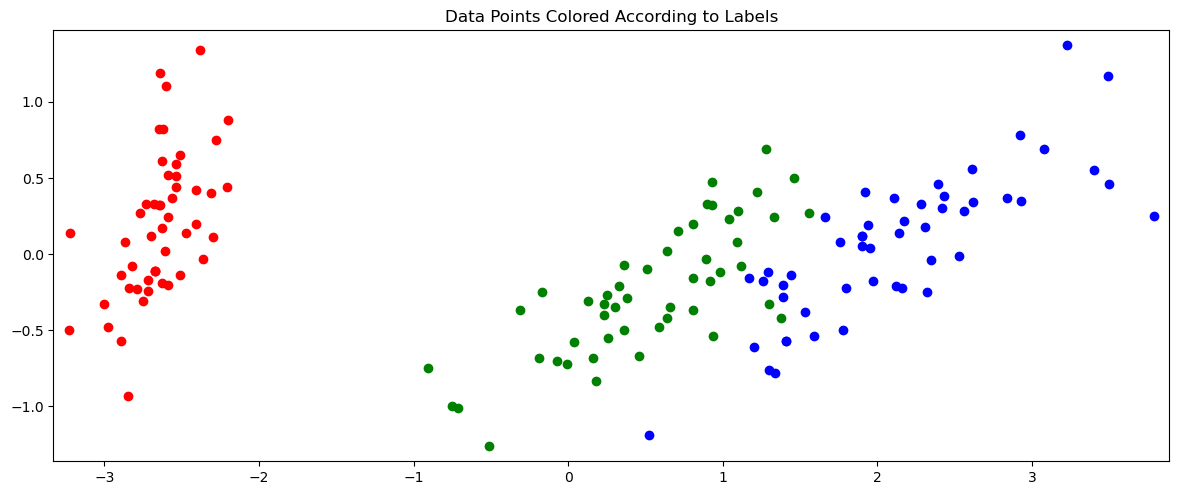

In [79]:

plt.figure(figsize=(14.4, 5.6))
plt.scatter(x_reduced[y==0, 0], x_reduced[y==0, 1], color='r')
plt.scatter(x_reduced[y==1, 0], x_reduced[y==1, 1], color='g')
plt.scatter(x_reduced[y==2, 0], x_reduced[y==2, 1], color='b')

plt.title('Data Points Colored According to Labels')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


Creating a 'KMeans' object with number of clusters equal to 3.  


In [80]:
KMeans=KMeans(n_clusters=3,random_state=42)
KMeans.fit(x)
kmeans_preds= KMeans.predict(x)
kmeans_preds


c:\Users\4444e\anaconda3\envs\yap101\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])


Transforming the cluster centers of KMeans oblect into 2-dimensional space using PCA object 

In [81]:

centers = KMeans.cluster_centers_
centers_reduced = PCA.transform(centers)
kmeans_centers_reduced = centers_reduced
kmeans_centers_reduced

array([[ 0.67443933, -0.31390945],
       [-2.64084076,  0.19051995],
       [ 2.37438946,  0.2614839 ]])

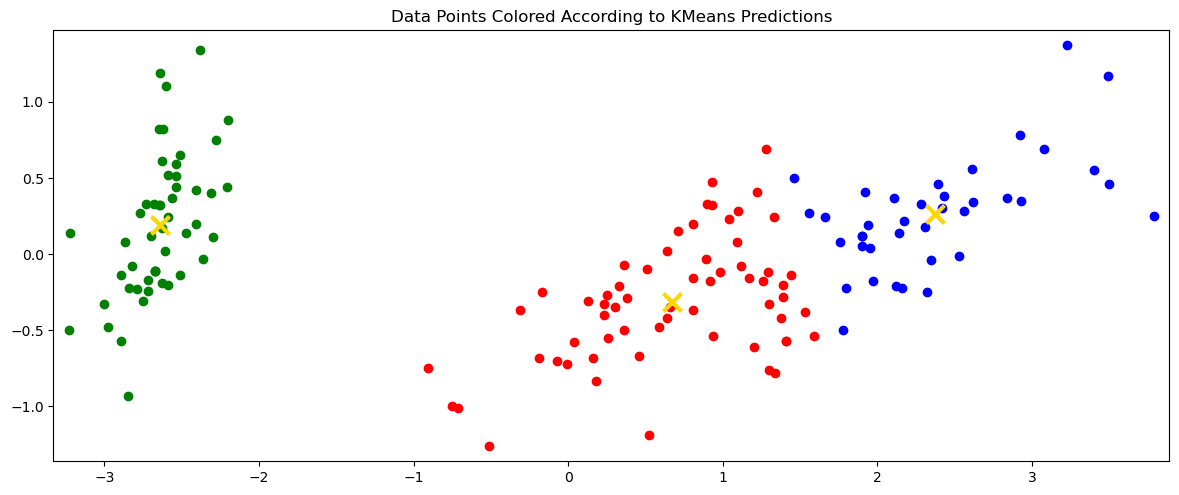

In [82]:

plt.figure(figsize=(14.4, 5.6))
plt.scatter(x_reduced[kmeans_preds==0, 0], x_reduced[kmeans_preds==0, 1], color="r")
plt.scatter(x_reduced[kmeans_preds==1, 0], x_reduced[kmeans_preds==1, 1], color="g")
plt.scatter(x_reduced[kmeans_preds==2, 0], x_reduced[kmeans_preds==2, 1], color="b")

plt.scatter(
    kmeans_centers_reduced[:, 0],
    kmeans_centers_reduced[:, 1],
    marker="x",
    color="gold",
    s=169,
    linewidths=3,
)

plt.title('Data Points Colored According to KMeans Predictions')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


Creating a 'GaussianMixture' object with number of components equal to 3.  
fitting 'x' to GaussianMixture object.  
Store the predictions of GaussianMixture in gm_preds

In [83]:

GaussianMixture=GaussianMixture(n_components=3,random_state=42)
GaussianMixture.fit(x)
gm_preds=GaussianMixture.predict(x)
gm_preds


c:\Users\4444e\anaconda3\envs\yap101\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)


Transforming the cluster centers of GaussianMixture oblect into 2-dimensional space using PCA object and save as 'gm_centers_reduced'.

In [84]:

centers = GaussianMixture.means_
centers_reduced = PCA.transform(centers)
gm_centers_reduced = centers_reduced
gm_centers_reduced

array([[ 2.02337257,  0.02319746],
       [-2.64084076,  0.19051995],
       [ 0.46784643, -0.2389308 ]])

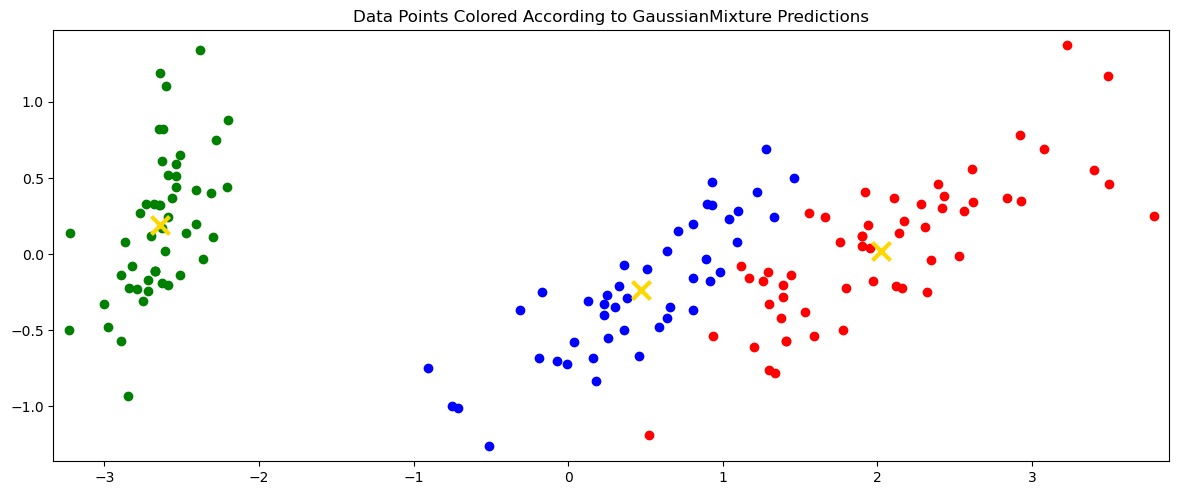

In [85]:

plt.figure(figsize=(14.4, 5.6))
plt.scatter(x_reduced[gm_preds==0, 0], x_reduced[gm_preds==0, 1], color="r")
plt.scatter(x_reduced[gm_preds==1, 0], x_reduced[gm_preds==1, 1], color="g")
plt.scatter(x_reduced[gm_preds==2, 0], x_reduced[gm_preds==2, 1], color="b")

plt.scatter(
    gm_centers_reduced[:, 0],
    gm_centers_reduced[:, 1],
    marker="x",
    color="gold",
    s=169,
    linewidths=3,
)

plt.title('Data Points Colored According to GaussianMixture Predictions')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()